# Soal 1: Pemahaman Teori
Jelaskan perbedaan antara Univariate, Bivariate dan Multivariate Analysis 

Jawaban:

Univariate = merupakan analisa data feature tunggal.

---

Bivariate = merupakan analisa dua data feature.

---

Multivariate = merupakan analisa multiple data feature.

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species              344 non-null object
island               344 non-null object
bill_length_mm       342 non-null float64
bill_depth_mm        342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  333 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB




---



---



---



# Soal 2. Persiapan Data

*   Hapus nilai missing dalam rows dataset menggunakan atribut.dropna()

*   Lakukan grouping data berdasarkan kolom 'species' dengan menggunakan agregasi mean()



In [17]:
#code here
df = df.dropna()
df_group_species = df.groupby('species').mean()
df_group_species

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


Expected output:

![tanpa handling missing value](https://drive.google.com/uc?id=1OnuXmscVRqduqT_TYI1vB291rpXM4D_1)


# Soal 3. Univariate Analysis
Buatlah sebuah analisa univariate dengan menggunakan perintah seperti berikut:

*   Buatlah sebuah Pie plot dari dataset hasil grouping untuk kolom flipper_length_mm seperti expected output berikut:
*   Buatlah sebuah plot histogram dari dataset awal (sebelum grouping) untuk kolom body_mass_g
*   Jelaskan insight yang diperoleh dari ke dua grafik tersebut.





In [38]:
adelie_value = df_group_species[df_group_species['flipper_length_mm'].index == 'Adelie'].flipper_length_mm.values[0]
percent = adelie_value/df_group_species['flipper_length_mm'].values.sum()
print(percent)

0.31517714540692443


Pie Chart


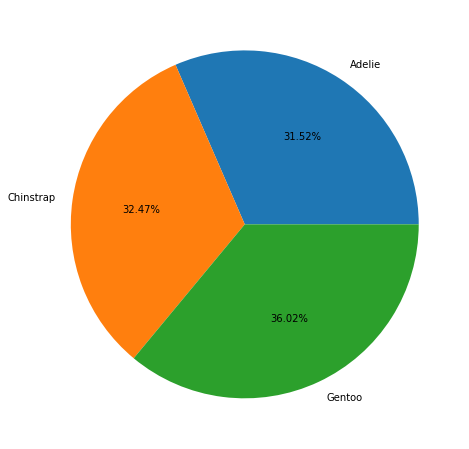

In [24]:
#code here
fig1,ax1 = plt.subplots(figsize=(12,8))
langs = ['Adelie','Chinstrap','Gentoo']
ax1.pie(df_group_species['flipper_length_mm'],labels=langs,autopct='%1.2f%%')
print('Pie Chart')
plt.show()

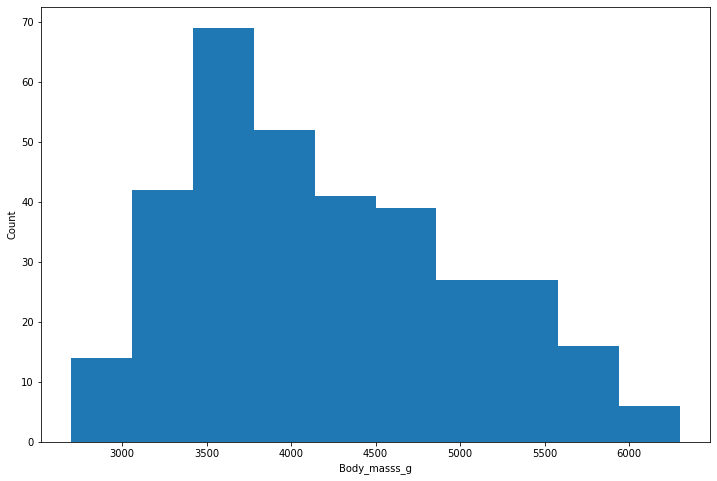

In [28]:
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.hist(df.body_mass_g)
ax2.set_xlabel('Body_masss_g')
ax2.set_ylabel('Count')
plt.show()

Expected Output:


Pie Chart

![](https://drive.google.com/uc?id=11H6X7xpEeodPWD56tHBhV4sLrJ-6B-Bd)

Histogram

![](https://drive.google.com/uc?id=1A_twS7BbQhkGvUz7zAWgye7q3ZRTQkhi)

Analisa:

pada pie chart, kita bisa tahu persentase perbandingan flipper_length_mm disetiap species.

---
pada histogram, kita bisa tahu frekuensi sebaran data dari body_mass_g.

---



---



# Soal 4. Bivariate Analysis



*   Buatlah sebuah grafik catplot menggunakan seaborn dengan x='sex', y='bill_length_mm' dan kind 'bar' seperti expected output di bawah
*   Buatlah sebuah grafik scatter plot menggunakan seaborn dengan x='body_mass_g', y='flipper_length_mm', hue='bill_length_mm' seperti expected dibawah
*   Jelaskan insight yang diperoleh dari hasil analisa bivariate tersebut






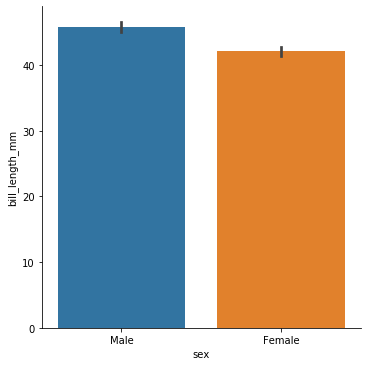

In [40]:
#code here
import seaborn as sns

sns.catplot(x='sex',y='bill_length_mm',data=df,kind='bar')
plt.show()

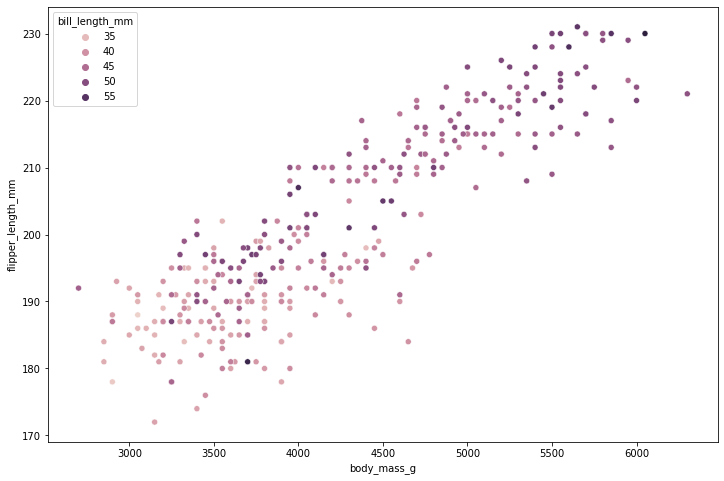

In [44]:
fig3, ax3 = plt.subplots(figsize=(12,8))
sns.scatterplot(x='body_mass_g', y='flipper_length_mm',data=df,hue='bill_length_mm')
plt.show()

Expected Output:

Catplot

![](https://drive.google.com/uc?id=1imCbGD9cWqXUjd33tAh6D0OH20vVpWea)

Scatter plot

![](https://drive.google.com/uc?id=1_k734IpRYq6Q1wF57hwzSEjnVd2Sii2Z)

Analisa:


---

untuk catplot, visualisasi data tsb menganalisa perbandingan bill_length_mm untuk atribut sex berupa male and female

---

untuk scatterplot, visualisasi data tsb menganalisa hubungan antara body_mass_g dan flipper_length_mm dengan mengkategorikan warna sesuai dengan data bill_length_mm, semakin tinggi value dari bill_length_mm maka akan diberi warna semakin gelap.

---



# Soal 5. Multivariate Analisis

*   Dengan menggunakan seaborn, buatlah sebuah pairplot keseluruhan data feature pada dataset (df) dengan argumen kind='bar', seperti expected di bawah:
*   Jelaskan hasil analisa dari multivariate yang dihasilkan



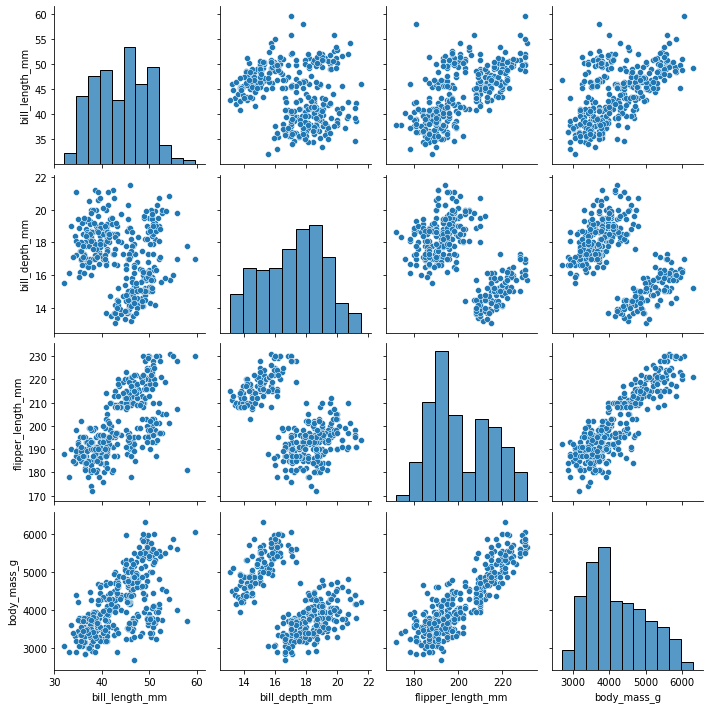

In [50]:
#code here

sns.pairplot(vars=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],data=df)
plt.show()

Expected output:

Pair plot

![](https://drive.google.com/uc?id=1td8WAZLJEW5BPTq-wEJyZ4soRNNLXfqX)

Analisa:



---
visualisasi data diatas menunjukkan sebaran data dan korelasi antara variabel 'bill_length_mm','bill_depth_mm','flipper_length_mm',dan 'body_mass_g'. kita gambar diatas kita dapat mengetahui apakah antar varibel-variabel tersebut memiliki hubungan atau tidak, jika iya apakah hubungan tsb positif atau negatif. sebagai contoh yang paling jelas ada di plotingan hubungan antara flipper_length_mm dan boddy_mass_g. pada grafik tsb kita dapat menyimpulkan bahwa ketika nilai dari body_mass_g naik, maka flipper_length_mm juga naik. Ini artinya kedua variabel tsb memiliki HUbungan yang positif.

---



---

